In [1]:
#for mounting drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Reading cleaned dataset
import pandas as pd
path = '/content/drive/My Drive/BE PROJECT/Lawgical Final/LabelledDataset/'
df = pd.read_csv(path+'cleaned_dataset_new.csv')

In [0]:
# Splitting the dataset into train and test sets
X = df.loc[:,'Judgement'].values
y = df.loc[:,'label'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

In [4]:
# Vectorizinf the corpus using TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range = (1,2),max_features=10000) 
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(1192, 10000) (512, 10000)


In [0]:
! pip install -q scikit-plot

In [0]:
from  sklearn.metrics  import accuracy_score
from  sklearn.metrics  import recall_score
from  sklearn.metrics  import precision_score
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

In [0]:
# Algorithm 1 : Naive Bayes (Multinomial and Complement)

Accuracy Score =  0.646484375
Recall Score =  0.9868852459016394
Precision Score =  0.6297071129707112
[[ 30 177]
 [  4 301]]


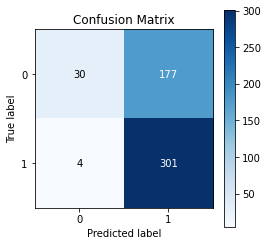

In [0]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train)

predicted = clf.predict(test_vectors)
print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted))
print('Precision Score = ',precision_score(y_test,predicted))
print(confusion_matrix(y_test, predicted))
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(4,4))

Accuracy Score =  0.681640625
Recall Score =  0.760655737704918
Precision Score =  0.7204968944099379
[[117  90]
 [ 73 232]]


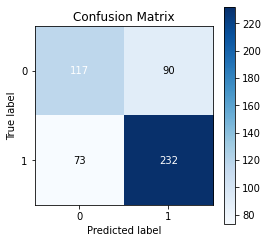

In [7]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=0.001).fit(train_vectors, y_train)

predicted = clf.predict(test_vectors)
print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted))
print('Precision Score = ',precision_score(y_test,predicted))
print(confusion_matrix(y_test, predicted))
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(4,4))

Accuracy Score =  0.68359375
Recall Score =  0.7639344262295082
Precision Score =  0.7213622291021672
[[117  90]
 [ 72 233]]


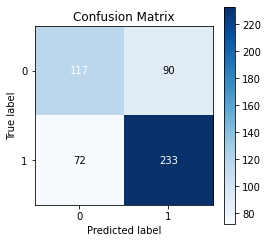

In [0]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=0.0001).fit(train_vectors, y_train)

predicted = clf.predict(test_vectors)
print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted))
print('Precision Score = ',precision_score(y_test,predicted))
print(confusion_matrix(y_test, predicted))
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(4,4))

Accuracy Score =  0.490234375
Recall Score =  0.14754098360655737
Precision Score =  0.9782608695652174
[[206   1]
 [260  45]]


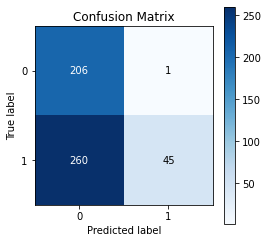

In [0]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=2.2, class_prior= [88,16]).fit(train_vectors, y_train)

predicted = clf.predict(test_vectors)
print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted))
print('Precision Score = ',precision_score(y_test,predicted))
print(confusion_matrix(y_test, predicted))
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(4,4))

Accuracy Score =  0.517578125
Recall Score =  0.22295081967213115
Precision Score =  0.8717948717948718


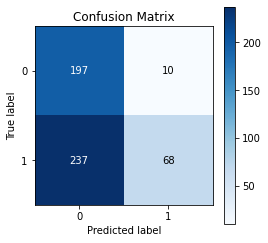

In [0]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha= 3,class_prior= [88,21]).fit(train_vectors, y_train)

predicted = clf.predict(test_vectors)
print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted))
print('Precision Score = ',precision_score(y_test,predicted))
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(4,4))

Accuracy Score =  0.658203125
Recall Score =  0.7737704918032787
Precision Score =  0.6900584795321637


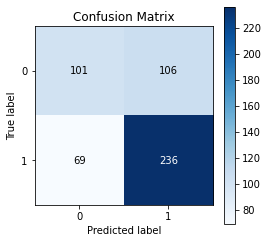

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
text_clf = Pipeline([ ('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB(alpha=0.0001)),])

text_clf.fit(X_train, y_train)

predicted = text_clf.predict(X_test)
print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted))
print('Precision Score = ',precision_score(y_test,predicted))
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(4,4))

In [0]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 2)],'tfidf__use_idf': (True, False),'clf__alpha': (1e-2, 1e-3, 1e-4, 1e-5),}

In [0]:
gs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=-1)

In [0]:
gs_clf = gs_clf.fit(X_train, y_train)

Accuracy Score =  0.7265625
Recall Score =  0.8590163934426229
Precision Score =  0.7298050139275766


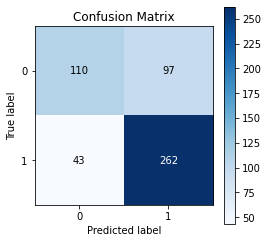

In [12]:
predicted = gs_clf.predict(X_test)
print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted))
print('Precision Score = ',precision_score(y_test,predicted))
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(4,4))

In [0]:
gs_clf.best_score_

0.7105411202137759

In [0]:
for param_name in sorted(parameters.keys()):
  print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__alpha: 0.001
tfidf__use_idf: False
vect__ngram_range: (1, 2)


Accuracy Score =  0.66015625
Recall Score =  0.9114754098360656
Precision Score =  0.6541176470588236


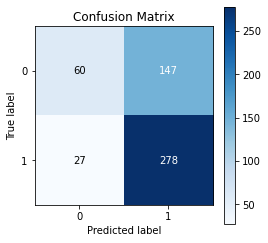

In [0]:
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB().fit(train_vectors, y_train)

predicted = cnb.predict(test_vectors)
print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted))
print('Precision Score = ',precision_score(y_test,predicted))
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(4,4))

Accuracy Score =  0.62109375
Recall Score =  0.9967213114754099
Precision Score =  0.6116700201207244


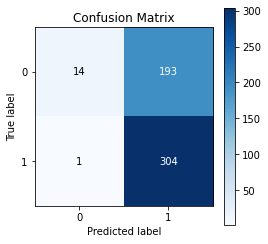

In [0]:
from sklearn.naive_bayes import ComplementNB
cnb.class_count_= [219,293]
cnb = ComplementNB(alpha=3,class_prior=[88,16]).fit(train_vectors, y_train)

predicted = cnb.predict(test_vectors)
print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted))
print('Precision Score = ',precision_score(y_test,predicted))
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(4,4))

Accuracy Score =  0.689453125
Recall Score =  0.6950819672131148
Precision Score =  0.762589928057554


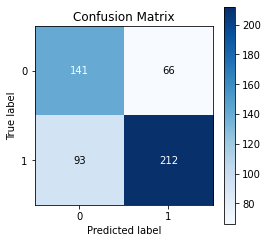

In [0]:
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB(alpha=0.0000001).fit(train_vectors, y_train)

predicted = cnb.predict(test_vectors)
print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted))
print('Precision Score = ',precision_score(y_test,predicted))
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(4,4))

Accuracy Score =  0.689453125
Recall Score =  0.6950819672131148
Precision Score =  0.762589928057554


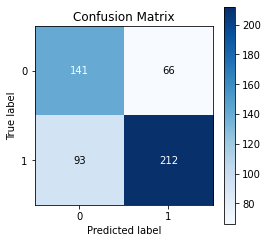

In [0]:
from sklearn.naive_bayes import ComplementNB
cnb.class_count_= [219,293]
cnb = ComplementNB(alpha=0.0000001,class_prior=[88,16]).fit(train_vectors, y_train)

predicted = cnb.predict(test_vectors)
print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted))
print('Precision Score = ',precision_score(y_test,predicted))
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(4,4))